<a href="https://colab.research.google.com/github/DamodaraBarbosa/eleicoes_ceara_2022/blob/main/07_senador_analysis_eleicoes_ceara_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas geobr descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importando as bibliotecas

In [45]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geobr import read_municipality
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Para ignorar qualquer aviso:

import warnings

warnings.filterwarnings("ignore")

# 1. Carregamento dos dados no *dataframe*

In [4]:
votacao_ce = pd.read_csv(
    '/content/drive/MyDrive/Datasets/votacao_secao_2022_CE_tratado.csv',
    encoding= 'latin-1', sep= ','
)

In [5]:
votacao_ce.head()

,nm_municipio,nr_zona,nr_secao,ds_cargo,nr_votavel,nm_votavel,qt_votos
0,FORTALEZA,94,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,4
1,RUSSAS,9,266,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,13
2,PARAIPABA,109,119,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,3
3,ITAPIPOCA,17,25,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,2
4,SABOEIRO,43,228,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,4


# 2. Informações do *dataframe*

A base de dados utilizada nesta análise é a mesma feita em outras análises. Portanto, algumas informações do *dataframe* como as suas dimensões, os tipos de dado de cada coluna e a presença de dados duplicados e faltantes podem ser vistas no *notebook*: https://github.com/DamodaraBarbosa/eleicoes_ceara_2022/blob/main/06_governador_analysis_eleicoes_ceara_2022.ipynb.

# 3. Tratamento dos dados

Apesar de serem valores numéricos, os dados das colunas `nr_zona` e `nr_secao` são categóricos já que representam zonas e seções eleitorais. 

In [6]:
# Conversão dos dados das colunas para tipo string:

votacao_ce['nr_zona'] = votacao_ce['nr_zona'].astype(str)
votacao_ce['nr_secao'] = votacao_ce['nr_secao'].astype(str)

In [7]:
votacao_ce.dtypes

nm_municipio    object
nr_zona         object
nr_secao        object
ds_cargo        object
nr_votavel       int64
nm_votavel      object
qt_votos         int64
dtype: object

# 4. Análise eleitoral para cargo de senador do estado do Ceará

## 4.1 Candidatos

In [8]:
# Buscam-se apenas os dados referentes ao cargo de senador:

senador = votacao_ce.query('ds_cargo == "SENADOR"')
senador.head()

,nm_municipio,nr_zona,nr_secao,ds_cargo,nr_votavel,nm_votavel,qt_votos
575,LIMOEIRO DO NORTE,29,109,SENADOR,95,VOTO BRANCO,7
576,CANINDÉ,33,488,SENADOR,95,VOTO BRANCO,14
577,SÃO LUÍS DO CURU,23,323,SENADOR,95,VOTO BRANCO,16
578,BARREIRA,52,142,SENADOR,95,VOTO BRANCO,12
579,CRATO,27,304,SENADOR,95,VOTO BRANCO,10


Ao buscar os dados únicos na coluna `nm_votavel` observa-se que:

In [9]:
senador['nm_votavel'].unique()

array(['VOTO BRANCO', 'VOTO NULO', 'CAMILO SOBREIRA DE SANTANA',
       'FRANCISCO CARLOS ALVES DA SILVA', 'ERIKA GONÇALVES AMORIM',
       'KAMILA CARDOSO DE SOUZA RIBEIRO'], dtype=object)

Excetuando-se votos em branco e nulos, os candidados são: Camilo Santana, Fco Carlos Silva, Erika Gonçalves e Kamila Cardoso.

## 4.2 Votos por candidato

In [10]:
# Os votos por senador são determinados e o dataframe é ordenado decrescentemente:

votos_por_senador = senador.groupby('nm_votavel')['qt_votos'].sum().to_frame().sort_values('qt_votos', ascending= False)
votos_por_senador

,qt_votos
nm_votavel,
CAMILO SOBREIRA DE SANTANA,3389513
KAMILA CARDOSO DE SOUZA RIBEIRO,1273272
VOTO NULO,451233
VOTO BRANCO,313270
ERIKA GONÇALVES AMORIM,193243
FRANCISCO CARLOS ALVES DA SILVA,2919


Os dados são mostrados no gráfico:

In [11]:
fig = px.bar(
    data_frame= votos_por_senador,
    y= votos_por_senador.index,
    x= 'qt_votos', text= 'qt_votos',
    color= votos_por_senador.index,
    title= 'Votos nos candidatos ao cargo de senador do Ceará'
)
fig.update_xaxes(range= [0, 3.7e6])
fig.update_layout(title= dict(x= 0.5), yaxis_title= 'Candidatos', xaxis_title= 'Quantidade de votos', showlegend= False)
fig.update_traces(textfont_size= 12, textposition= 'outside')
fig.show()

## 4.3 Porcentagem dos votos totais e válidos ao senado

In [12]:
# Excetuam-se os votos brancos e nulos:

votos_validos = senador.query('nm_votavel != ["VOTO NULO", "VOTO BRANCO"]')

# Calcula-se apenas os votos válidos:

total_votos_validos = votos_validos['qt_votos'].sum()
print(f'Votos válidos: {total_votos_validos}')

# Votos totais incluindo brancos e nulos:

total_votos = senador['qt_votos'].sum()
print(f'Votos totais: {total_votos}')

Votos válidos: 4858947
Votos totais: 5623450


Verifica-se que nem VOTO BRANCO E VOTO NULO estão mais presentes no conjunto de dados.

In [13]:
votos_validos['nm_votavel'].unique()

array(['CAMILO SOBREIRA DE SANTANA', 'FRANCISCO CARLOS ALVES DA SILVA',
       'ERIKA GONÇALVES AMORIM', 'KAMILA CARDOSO DE SOUZA RIBEIRO'],
      dtype=object)

Um *dataframe* contendo as informações sobre porcentagens dos votos é instanciado:

In [14]:
senador.groupby('nm_votavel')['qt_votos'].sum().sort_values(ascending= True).transpose()

nm_votavel
FRANCISCO CARLOS ALVES DA SILVA       2919
ERIKA GONÇALVES AMORIM              193243
VOTO BRANCO                         313270
VOTO NULO                           451233
KAMILA CARDOSO DE SOUZA RIBEIRO    1273272
CAMILO SOBREIRA DE SANTANA         3389513
Name: qt_votos, dtype: int64

In [15]:
# Instancia-se um dataframe contendo a porcentagem de votos totais e votos válidos por candidato ao senado:

porcentagem_votos_senador = pd.DataFrame(
    {'Votos totais': round((senador.groupby('nm_votavel')['qt_votos'].sum()/total_votos) * 100, 2), # cálculo da porcentagem de votos totais.
     'Votos válidos': round((votos_validos.groupby('nm_votavel')['qt_votos'].sum()/total_votos_validos) * 100, 2)} # cálculo da porcentagem de votos válidos.
).sort_values(['Votos totais', 'Votos válidos'], ascending= [False, False]) # os dados são ordenados em ordem decrescente.

# Utiliza-se o método transpose para invetar index em colunas e vice-versa:

porcentagem_votos_senador = porcentagem_votos_senador.transpose()

porcentagem_votos_senador

nm_votavel,CAMILO SOBREIRA DE SANTANA,KAMILA CARDOSO DE SOUZA RIBEIRO,VOTO NULO,VOTO BRANCO,ERIKA GONÇALVES AMORIM,FRANCISCO CARLOS ALVES DA SILVA
Votos totais,60.27,22.64,8.02,5.57,3.44,0.05
Votos válidos,69.76,26.20,NaN,NaN,3.98,0.06


O resultado é mostrado abaixo:

In [16]:
fig = px.bar(
    data_frame= porcentagem_votos_senador,
    y= porcentagem_votos_senador.index,
    x= porcentagem_votos_senador.columns,
    title= 'Porcentagem dos votos totais e válidos ao cargo de senador do Ceará'
)
fig.update_layout(
    yaxis= dict(autorange= 'reversed'), xaxis_title= 'Porcentagem dos votos', 
    yaxis_title= '', legend_title= 'Candidatos', title= dict(x= 0.5)
)
fig.show()

## 4.4 Votos por município cearense

In [17]:
# Os votos nos cadidatos ao senado são determinados:

votos_candidatos_por_municipio = senador.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# Os dados são ordenados em ordem alfabética para os municípios e em ordem decrescente para os votos:

votos_candidatos_por_municipio = votos_candidatos_por_municipio.sort_values(['nm_municipio', 'qt_votos'], ascending= [True, False])

# Seleciona-se apenas o senador que obteve mais votos em cada município:

vencedores_por_municipio = votos_candidatos_por_municipio.groupby('nm_municipio').head(1)
vencedores_por_municipio.head() # para visualizar o dataframe.

,nm_municipio,nm_votavel,qt_votos
0,ABAIARA,CAMILO SOBREIRA DE SANTANA,4420
6,ACARAPE,CAMILO SOBREIRA DE SANTANA,5489
11,ACARAÚ,CAMILO SOBREIRA DE SANTANA,22540
17,ACOPIARA,CAMILO SOBREIRA DE SANTANA,19132
23,AIUABA,CAMILO SOBREIRA DE SANTANA,6970


Para visualização, utilizam-se os dados geoespaciais do estado do Ceará.

In [18]:
# Dataframe com dados geoespaciais dos municípios cearenses:

ceara_gpd = read_municipality(code_muni= 23, year= 2020)

# Um pequeno tratamento é feito para que os nomes dos municípios estejam em caixa alta:

ceara_gpd['name_muni'] = ceara_gpd['name_muni'].str.upper()

ceara_gpd.head() # visualização do dataframe.

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,2300101.0,ABAIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ..."
1,2300150.0,ACARAPE,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ..."
2,2300200.0,ACARAÚ,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.30984 -2.80769, -40.26882 ..."
3,2300309.0,ACOPIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.15631 -5.95731, -39.15267 ..."
4,2300408.0,AIUABA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.11801 -6.34845, -40.11298 ..."


Os dados são cruzados:

In [19]:
vencedores_por_municipio_gpd = pd.merge(
    left= ceara_gpd[['name_muni', 'geometry']], right= vencedores_por_municipio,
    how= 'left', left_on= 'name_muni', right_on= 'nm_municipio'
).drop('name_muni', axis= 1) # a coluna é eliminada visto que possui dados redundantes.

In [20]:
vencedores_por_municipio_gpd.head()

,geometry,nm_municipio,nm_votavel,qt_votos
0,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",ABAIARA,CAMILO SOBREIRA DE SANTANA,4420
1,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ...",ACARAPE,CAMILO SOBREIRA DE SANTANA,5489
2,"MULTIPOLYGON (((-40.30984 -2.80769, -40.26882 ...",ACARAÚ,CAMILO SOBREIRA DE SANTANA,22540
3,"MULTIPOLYGON (((-39.15631 -5.95731, -39.15267 ...",ACOPIARA,CAMILO SOBREIRA DE SANTANA,19132
4,"MULTIPOLYGON (((-40.11801 -6.34845, -40.11298 ...",AIUABA,CAMILO SOBREIRA DE SANTANA,6970


O resultado é mostrado no mapa abaixo:

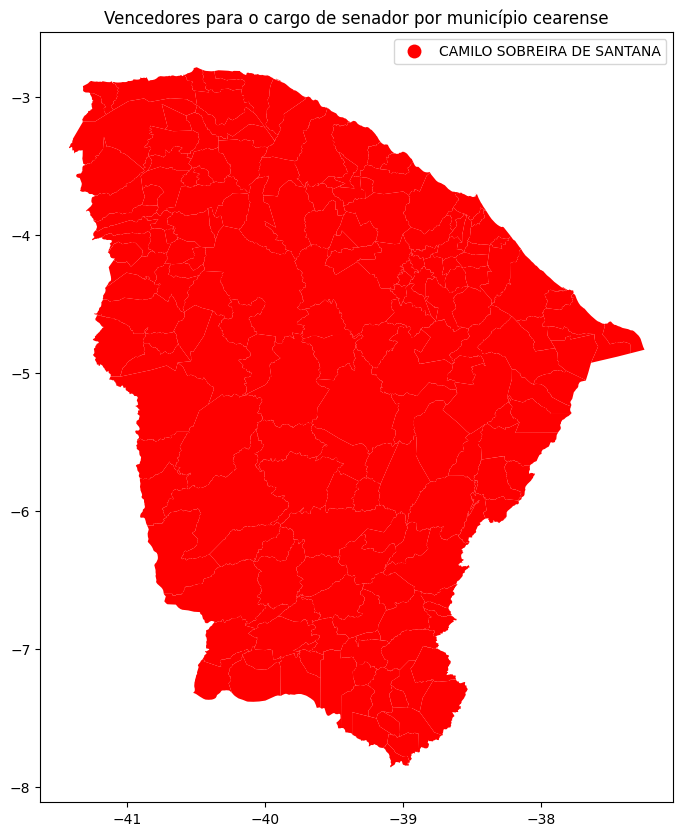

In [21]:
ax = vencedores_por_municipio_gpd.plot(
    'nm_votavel', cmap= 'autumn', legend= True,
    legend_kwds= {'loc': 'upper right'},
    figsize= (12, 10)
)
ax.set_title('Vencedores para o cargo de senador por município cearense')
plt.show()

* O candidato eleito Camilo Santana obteve mais votos em todos os municípios cearenses.

## 4.5 Votos para senador nos municípios da Região Metropolitana de Fortaleza

A Região Metropolitana de Fortaleza é constituída de 19 municípios sendo eles:

* Aquiraz, Cascavel, Caucaia, Chorozinho, Eusébio, Fortaleza, Guaiúba, Horizonte, Itaitinga, Maracanaú, Maranguape, Pacajus, Pacatuba, Pindoretama, São Gonçalo do Amarante, São Luís do Curu, Paraipaba, Paracuru e Trairi. 

Fonte: https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_Fortaleza


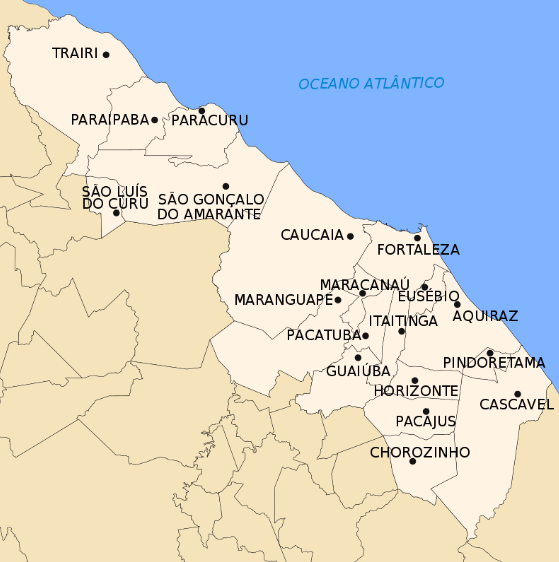

A lista abaixo contém o nome de todos os municípios, em caixa alta, que fazem parte da Região Metropolitana de Fortaleza:

In [22]:
regiao_metropolitana = [
    'AQUIRAZ', 'CASCAVEL', 'CAUCAIA', 'CHOROZINHO', 'EUSÉBIO', 
    'FORTALEZA', 'GUAIÚBA', 'HORIZONTE', 'ITAITINGA', 'MARACANAÚ', 
    'MARANGUAPE', 'PACAJUS', 'PACATUBA', 'PINDORETAMA', 
    'SÃO GONÇALO DO AMARANTE', 'SÃO LUÍS DO CURU',
    'PARAIPABA', 'PARACURU', 'TRAIRI'
]

### 4.5.1 Porcentagem dos votos para o cargo de senador por município da Região Metropolitana de Fortaleza

In [23]:
# Buscam-se no conjunto de dados ao cargo de senador apenas os municípios da Região Metropolitana de Fortaleza:

senador_regiao_metropolitana = senador.query('nm_municipio in @regiao_metropolitana')

# Agrupam-se os dados por município e candidato para determinar os votos:

vencedores_regiao_metropolitana = senador_regiao_metropolitana.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# Os dados são ordenados em ordem alfabética e em ordem decrescente do número de votos:

vencedores_regiao_metropolitana = vencedores_regiao_metropolitana.sort_values(['nm_municipio', 'qt_votos'], ascending= [True, False])

vencedores_regiao_metropolitana.head()

,nm_municipio,nm_votavel,qt_votos
0,AQUIRAZ,CAMILO SOBREIRA DE SANTANA,29895
3,AQUIRAZ,KAMILA CARDOSO DE SOUZA RIBEIRO,15239
5,AQUIRAZ,VOTO NULO,4330
4,AQUIRAZ,VOTO BRANCO,2900
1,AQUIRAZ,ERIKA GONÇALVES AMORIM,437


In [24]:
# Instancia um dicionário contendo o nº de votos totais ao cargo de senador por município da Região Metropolitana de Fortaleza:

votos_regiao_metropolitana = senador.groupby('nm_municipio')['qt_votos'].sum()
votos_regiao_metropolitana = dict(votos_regiao_metropolitana)

In [25]:
# Cálculo da porcentagem de votos que cada candidato ao senado obteve em cada município da Região Metropolitana de Fortaleza:
# Para isso define-se uma função para o cálculo.

def porcentagem_votos(dataframe: pd.DataFrame, dictionary: dict):

  percentual_de_votos = list()

  for index, row in dataframe.iterrows(): # itera-se o dataframe para obter cada linha dele.
    porcentagem = round((row['qt_votos']/dictionary[row['nm_municipio']]) * 100, 2) # os votos são divididos pelo total de votos por município.
    percentual_de_votos.append(porcentagem) # o valor calculado é adicionado a lista.

  return percentual_de_votos

In [26]:
# A coluna com porcentagem de votos é adicionada ao dataframe:

porcentagens = porcentagem_votos(vencedores_regiao_metropolitana, votos_regiao_metropolitana) # porcentagens armazena as porcentagens de votos.
vencedores_regiao_metropolitana['porcentagem'] = porcentagens # criação da nova coluna no dataframe.

In [27]:
vencedores_regiao_metropolitana.head()

,nm_municipio,nm_votavel,qt_votos,porcentagem
0,AQUIRAZ,CAMILO SOBREIRA DE SANTANA,29895,56.59
3,AQUIRAZ,KAMILA CARDOSO DE SOUZA RIBEIRO,15239,28.85
5,AQUIRAZ,VOTO NULO,4330,8.20
4,AQUIRAZ,VOTO BRANCO,2900,5.49
1,AQUIRAZ,ERIKA GONÇALVES AMORIM,437,0.83


In [28]:
fig = px.bar(
    data_frame= vencedores_regiao_metropolitana, y= 'nm_municipio', x= 'porcentagem', color= 'nm_votavel',
    title= 'Porcentagem dos votos nos candidados ao senado por município da Região Metropolitana de Fortaleza'
)
fig.update_layout(title= dict(x= 0.5), yaxis= dict(autorange= 'reversed'), yaxis_title= 'Municípios', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos')
fig.show()

* O candidato eleito Camilo Santana teve a maioria dos votos em todos os municípios da Região Metropolitana de Fortaleza, como visto anteriormente. Destaca-se o seu desempenho em Guaiúba onde obteve mais de 70% dos votos.
* A candidata Kamila Cardoso foi a segunda mais votada. Obteve melhor desempenho nos municípios de Fortaleza, Eusébio e São Gonçalo do Amarante.


## 4.6 Análise com indicadores do IBGE

In [29]:
dados_ibge = pd.read_csv('/content/drive/MyDrive/Datasets/resumo_dados_ibge_ce.csv', encoding= 'latin-1')

In [30]:
dados_ibge.head()

,nome,area_territorio,populacao,idhm,pib_per_capita,area_urbanizada,porcentagem_urbana,densidade_populacional
0,ABAIARA,180.833,11965,0.628,9158.04,3.19,1.76,66.17
1,ACARAPE,130.002,15140,0.606,10317.47,2.28,1.75,116.46
2,ACARAÚ,842.471,63556,0.601,13261.89,16.33,1.94,75.44
3,ACOPIARA,2254.279,54687,0.595,9432.25,5.46,0.24,24.26
4,AIUABA,2438.563,17584,0.569,8642.90,2.07,0.08,7.21


Visto que o candidato eleito Camilo Santana saiu como o mais votado em todos os municípios cearenses, não faz sentido comparar o mapa com os candidatos vencedores por município do Ceará. Portanto, as análises serão feitas comparando o mapa com o percentual de votos do candidato com os indicadores socioeconômicos o IBGE.

In [31]:
# Os votos no candidato eleito Camilo Santana por município cearense são obtidos:

votos_camilo_por_municipio = senador.query('nm_votavel == "CAMILO SOBREIRA DE SANTANA"')\
                                    .groupby('nm_municipio')['qt_votos'].sum().reset_index()

votos_camilo_por_municipio.head()

,nm_municipio,qt_votos
0,ABAIARA,4420
1,ACARAPE,5489
2,ACARAÚ,22540
3,ACOPIARA,19132
4,AIUABA,6970


In [32]:
# Somam-se os votos totais para cada município cearense:

votos_totais_por_municipio = senador.groupby('nm_municipio')['qt_votos'].sum()
votos_totais_por_municipio = dict(votos_totais_por_municipio) # dicionário com o nº de votos por município, cada nome do município é uma chave.

In [33]:
# A porcentagem de votos no candidato eleito Camilo Santana por município é, então, calculada:

porcentagens_camilo = porcentagem_votos(votos_camilo_por_municipio, votos_totais_por_municipio)

# E os valores são inseridos no dataframe com a criação de uma nova coluna:

votos_camilo_por_municipio['porcentagem_votos'] = porcentagens_camilo
votos_camilo_por_municipio.head()

,nm_municipio,qt_votos,porcentagem_votos
0,ABAIARA,4420,74.69
1,ACARAPE,5489,54.75
2,ACARAÚ,22540,61.38
3,ACOPIARA,19132,61.77
4,AIUABA,6970,80.48


Os dados geoespaciais devem ser adiocionados aos *dataframes* `votos_camilo_por_municipio` e `dados_ibge` para a visualização nos mapas. Portanto:

In [34]:
# É feito o merge dos dados geoespaciais dos municípios com os indicadores do IBGE:

dados_ibge = pd.merge(
    left= ceara_gpd[['name_muni', 'geometry']], right= dados_ibge,
    how= 'left', left_on= 'name_muni', right_on= 'nome'
)
dados_ibge = dados_ibge.drop('nome', axis= 1) # a coluna nome é retirada, pois é redundante.

# É feito o merge dos dados geoespaciais dos municípios com os dados dos votos no candidato eleito Camilo Santana:

votos_camilo_por_municipio = pd.merge(
    left= ceara_gpd[['name_muni', 'geometry']], right= votos_camilo_por_municipio,
    how= 'left', left_on= 'name_muni', right_on= 'nm_municipio'
)
votos_camilo_por_municipio = votos_camilo_por_municipio.drop('nm_municipio', axis= 1) # a coluna nm_municipio é retirada, pois é redundante.

### 4.6.1 Densidade populacional

O conjunto de dados na coluna `densidade_populacional` é bastante discrepante. O município de Fortaleza concentra mais de 2,5 milhões de habitantes em território modesto, se comparado a outros municípios cearenses. Portanto, aplica-se transformação logarítimica nos dados da coluna a fim de facilitar a visualização no mapa:

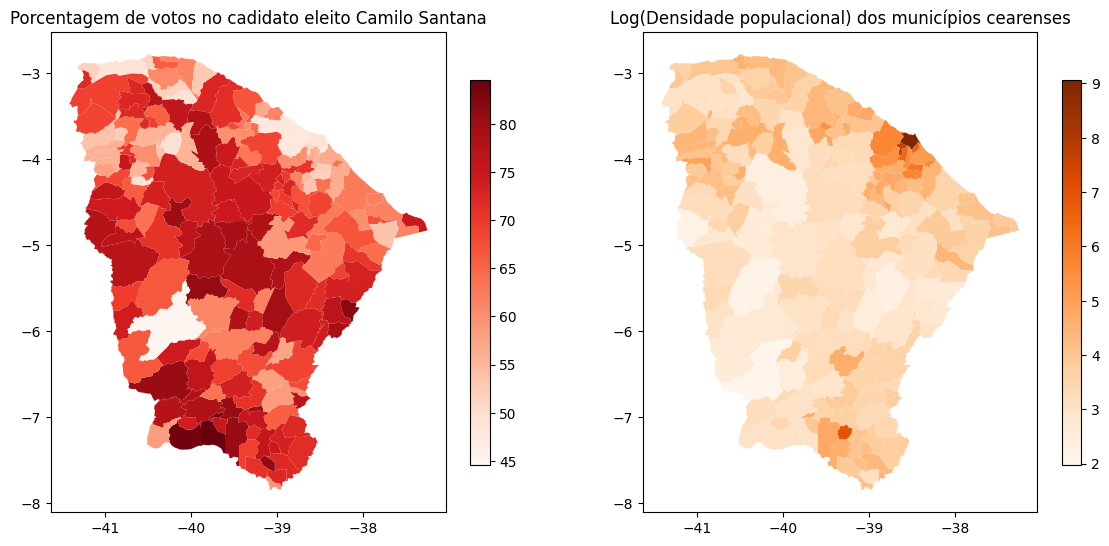

In [35]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_camilo_por_municipio.plot('porcentagem_votos', legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Porcentagem de votos no cadidato eleito Camilo Santana')
ax2 = dados_ibge.plot(np.log(dados_ibge['densidade_populacional']), cmap= 'Oranges', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Log(Densidade populacional) dos municípios cearenses')
plt.show()

### 4.6.2 Indíce de desenvolvimento humano municipal (IDHM)

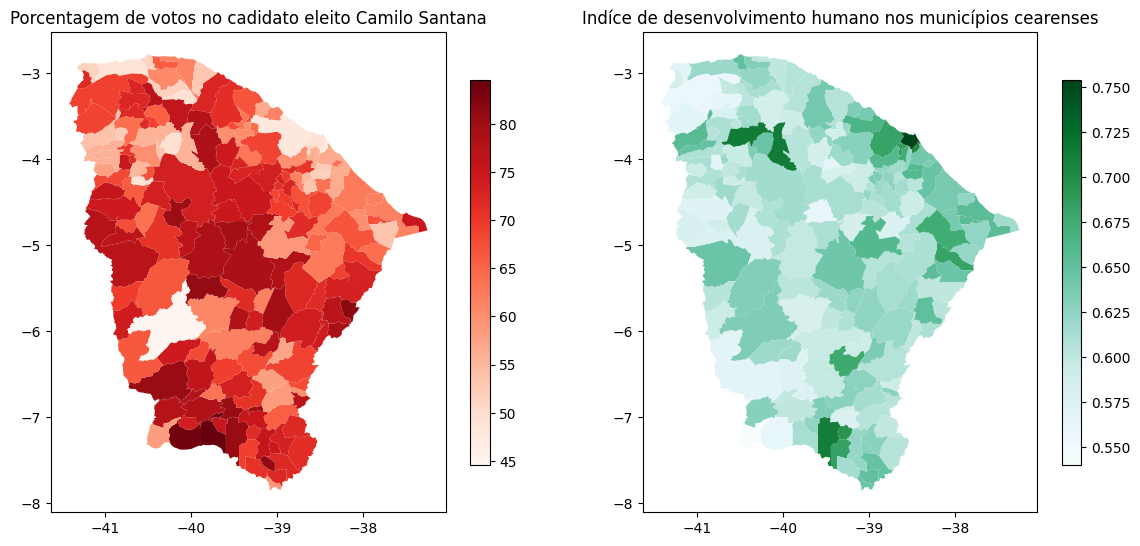

In [36]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_camilo_por_municipio.plot('porcentagem_votos', legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Porcentagem de votos no cadidato eleito Camilo Santana')
ax2 = dados_ibge.plot('idhm', cmap= 'BuGn', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Indíce de desenvolvimento humano nos municípios cearenses')
plt.show()

### 4.6.3 PIB *per capita*

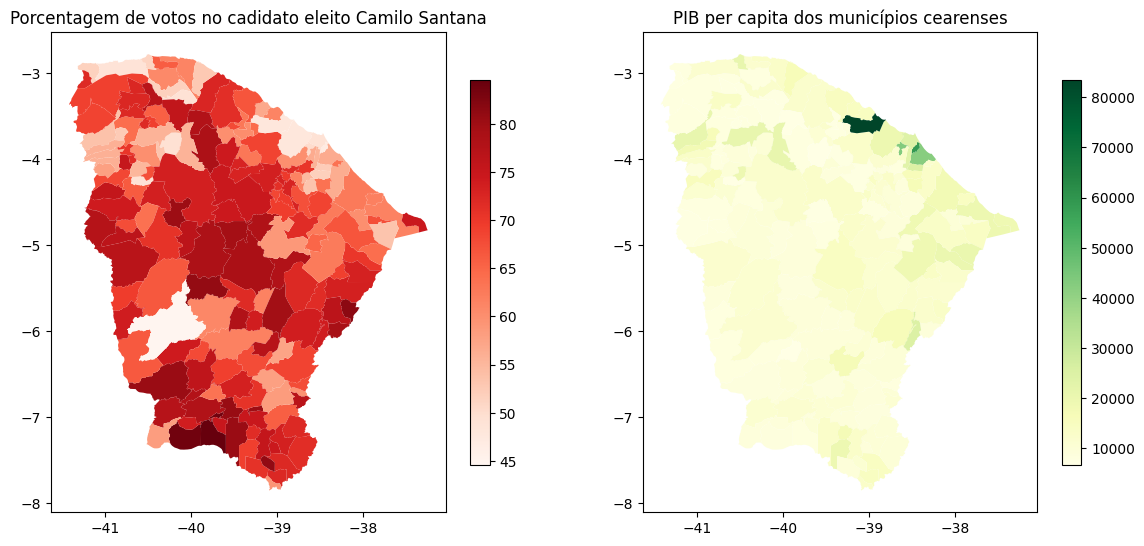

In [37]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_camilo_por_municipio.plot('porcentagem_votos', legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Porcentagem de votos no cadidato eleito Camilo Santana')
ax2 = dados_ibge.plot('pib_per_capita', cmap= 'YlGn', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('PIB per capita dos municípios cearenses')
plt.show()

### 4.6.4 Área urbanizada

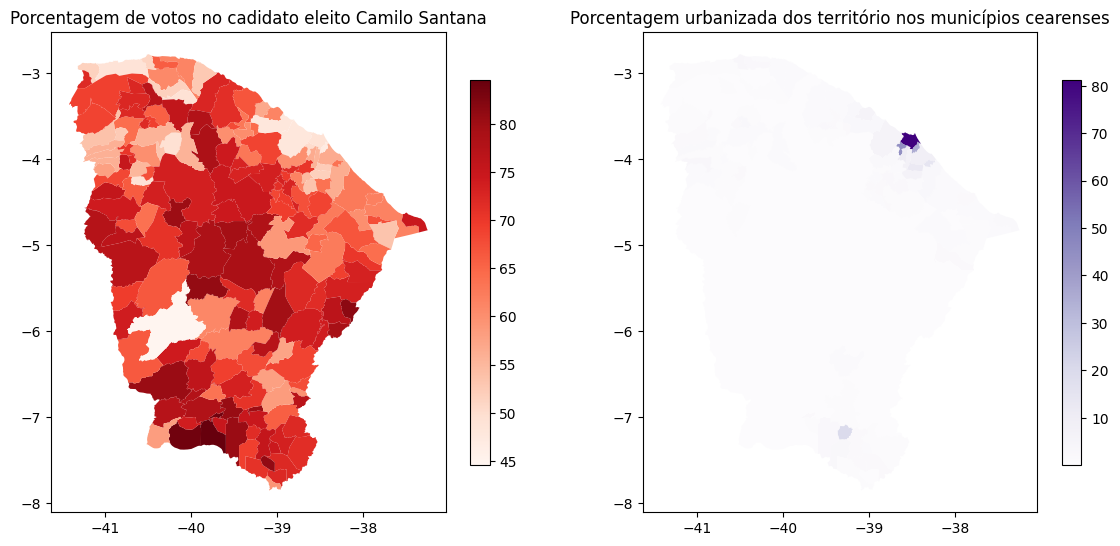

In [38]:
fig, ax = plt.subplots(1, 2, figsize= (14, 10))
ax1 = votos_camilo_por_municipio.plot('porcentagem_votos', legend= True, cmap= 'Reds', legend_kwds= {'shrink': 0.5}, ax= ax[0])
ax1.set_title('Porcentagem de votos no cadidato eleito Camilo Santana')
ax2 = dados_ibge.plot('porcentagem_urbana', cmap= 'Purples', legend= True, legend_kwds= {'shrink': 0.5}, ax= ax[1])
ax2.set_title('Porcentagem urbanizada dos território nos municípios cearenses')
plt.show()

## 4.7 Correlação entre o percentual de voto dos candidatos e os indíces socioeconômicos do IBGE

A correlação será estabelecida apenas entre os dois candidatos mais votados: Camilo Santana e Kamila Cardoso.

In [39]:
dados_camilo_kamila = senador.query('nm_votavel == "CAMILO SOBREIRA DE SANTANA" or nm_votavel == "KAMILA CARDOSO DE SOUZA RIBEIRO"')
dados_camilo_kamila.sample(5)

,nm_municipio,nr_zona,nr_secao,ds_cargo,nr_votavel,nm_votavel,qt_votos
445132,CEDRO,13,562,SENADOR,131,CAMILO SOBREIRA DE SANTANA,131
1451595,FORTALEZA,85,192,SENADOR,131,CAMILO SOBREIRA DE SANTANA,162
1976574,MARACANAÚ,104,371,SENADOR,131,CAMILO SOBREIRA DE SANTANA,135
2068097,SÃO BENEDITO,22,240,SENADOR,131,CAMILO SOBREIRA DE SANTANA,104
952331,PARACURU,109,22,SENADOR,131,CAMILO SOBREIRA DE SANTANA,175


In [40]:
# Os votos para os candidatos Camilo Santana e Kamila Cardoso por município:

dados_camilo_kamila = dados_camilo_kamila.groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()
dados_camilo_kamila.sample(5)

In [44]:
# Utiliza-se a função porcentagem_votos para determinar a porcentagem de votos recebido pelos candidatos nos municípios:

porcentagem_votos_camilo_kamila = porcentagem_votos(dados_camilo_kamila, votos_totais_por_municipio)

# Os dados são adicionados com a criação da coluna porcentagem_votos:

dados_camilo_kamila['porcentagem_votos'] = porcentagem_votos_camilo_kamila

dados_camilo_kamila.sample(5)

,nm_municipio,nm_votavel,qt_votos,porcentagem_votos
177,ITAPIÚNA,KAMILA CARDOSO DE SOUZA RIBEIRO,2170,16.83
22,AQUIRAZ,CAMILO SOBREIRA DE SANTANA,29895,56.59
190,JARDIM,CAMILO SOBREIRA DE SANTANA,11649,70.94
54,BEBERIBE,CAMILO SOBREIRA DE SANTANA,23182,62.61
130,GROAÍRAS,CAMILO SOBREIRA DE SANTANA,4004,53.44


In [51]:
# Os dados de indicadores do IBGE são unidos a tabela com porcentagem de votos dos candidatos Camilo e Kamila:

dados_camilo_kamila = pd.merge(
    left= dados_camilo_kamila, right= dados_ibge[['name_muni', 'idhm', 'pib_per_capita', 'porcentagem_urbana', 'densidade_populacional']],
    how= 'left', left_on= 'nm_municipio', right_on= 'name_muni'
)

dados_camilo_kamila = dados_camilo_kamila.drop('name_muni', axis= 1) # a coluna name_muni é retirada, pois são dados redundantes.

### 4.7.1 Densidade populacional

In [42]:
from plotly.subplots import make_subplots

In [58]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Camilo Santana', 'Kamila Cardoso'])

fig.add_trace(
    go.Scatter(y= dados_camilo_kamila.query('nm_votavel == "CAMILO SOBREIRA DE SANTANA"')['porcentagem_votos'], mode= 'markers',
               x= np.log(dados_camilo_kamila.query('nm_votavel == "CAMILO SOBREIRA DE SANTANA"')['densidade_populacional'])), row= 1, col= 1
)
fig.add_trace(
    go.Scatter(y= dados_camilo_kamila.query('nm_votavel == "KAMILA CARDOSO DE SOUZA RIBEIRO"')['porcentagem_votos'], mode= 'markers',
               x= np.log(dados_camilo_kamila.query('nm_votavel == "KAMILA CARDOSO DE SOUZA RIBEIRO"')['densidade_populacional'])), row=1, col= 2
)
fig.update_layout(title_text= 'Porcentagem de votos em relação ao log(Densidade populacional)', title= dict(x= 0.5), showlegend= False)
fig.update_yaxes(title_text= 'Porcentagem dos votos', row= 1, col= 1)
fig.update_xaxes(title_text= 'log(Densidade populacional)', row= 1, col= 1)
fig.update_xaxes(title_text= 'log(Densidade populacional)', row= 1, col= 2)
fig.show()

### 4.7.2 Indíce de desenvolvimento humano municipal

In [62]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Camilo Santana', 'Kamila Cardoso'])

fig.add_trace(
    go.Scatter(y= dados_camilo_kamila.query('nm_votavel == "CAMILO SOBREIRA DE SANTANA"')['porcentagem_votos'], mode= 'markers',
               x= dados_camilo_kamila.query('nm_votavel == "CAMILO SOBREIRA DE SANTANA"')['idhm']), row= 1, col= 1
)
fig.add_trace(
    go.Scatter(y= dados_camilo_kamila.query('nm_votavel == "KAMILA CARDOSO DE SOUZA RIBEIRO"')['porcentagem_votos'], mode= 'markers',
               x= dados_camilo_kamila.query('nm_votavel == "KAMILA CARDOSO DE SOUZA RIBEIRO"')['idhm']), row=1, col= 2
)
fig.update_layout(title_text= 'Porcentagem de votos em relação ao IDHM', title= dict(x= 0.5), showlegend= False)
fig.update_yaxes(title_text= 'Porcentagem dos votos', row= 1, col= 1)
fig.update_xaxes(title_text= 'IDHM', row= 1, col= 1)
fig.update_xaxes(title_text= 'IDHM', row= 1, col= 2)
fig.show()

### 4.7.3 PIB *per capita*

In [63]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Camilo Santana', 'Kamila Cardoso'])

fig.add_trace(
    go.Scatter(y= dados_camilo_kamila.query('nm_votavel == "CAMILO SOBREIRA DE SANTANA"')['porcentagem_votos'], mode= 'markers',
               x= np.log(dados_camilo_kamila.query('nm_votavel == "CAMILO SOBREIRA DE SANTANA"')['pib_per_capita'])), row= 1, col= 1
)
fig.add_trace(
    go.Scatter(y= dados_camilo_kamila.query('nm_votavel == "KAMILA CARDOSO DE SOUZA RIBEIRO"')['porcentagem_votos'], mode= 'markers',
               x= np.log(dados_camilo_kamila.query('nm_votavel == "KAMILA CARDOSO DE SOUZA RIBEIRO"')['pib_per_capita'])), row=1, col= 2
)
fig.update_layout(title_text= 'Porcentagem de votos em relação ao log(PIB per capita)', title= dict(x= 0.5), showlegend= False)
fig.update_yaxes(title_text= 'Porcentagem dos votos', row= 1, col= 1)
fig.update_xaxes(title_text= 'log(PIB per capita)', row= 1, col= 1)
fig.update_xaxes(title_text= 'log(PIB per capita)', row= 1, col= 2)
fig.show()

### 4.7.4 Porcentagem do território urbanizado

In [64]:
fig = make_subplots(rows= 1, cols= 2, subplot_titles= ['Camilo Santana', 'Kamila Cardoso'])

fig.add_trace(
    go.Scatter(y= dados_camilo_kamila.query('nm_votavel == "CAMILO SOBREIRA DE SANTANA"')['porcentagem_votos'], mode= 'markers',
               x= np.log(dados_camilo_kamila.query('nm_votavel == "CAMILO SOBREIRA DE SANTANA"')['porcentagem_urbana'])), row= 1, col= 1
)
fig.add_trace(
    go.Scatter(y= dados_camilo_kamila.query('nm_votavel == "KAMILA CARDOSO DE SOUZA RIBEIRO"')['porcentagem_votos'], mode= 'markers',
               x= np.log(dados_camilo_kamila.query('nm_votavel == "KAMILA CARDOSO DE SOUZA RIBEIRO"')['porcentagem_urbana'])), row=1, col= 2
)
fig.update_layout(title_text= 'Porcentagem de votos em relação ao log(Porcentagem urbana))', title= dict(x= 0.5), showlegend= False)
fig.update_yaxes(title_text= 'Porcentagem dos votos', row= 1, col= 1)
fig.update_xaxes(title_text= 'log(Porcentagem urbana)', row= 1, col= 1)
fig.update_xaxes(title_text= 'log(Porcentagem urbana)', row= 1, col= 2)
fig.show()